# K-Means++ vs. Coreset Trees

In [33]:
from layer_flow.data import DatasetFactory
from layer_flow.clustering import coreset_tree, kmpp
from layer_flow.clustering.draw import plot_cluster_hulls

import matplotlib.pyplot as plt
import time

## Performance Comparison

In [16]:
seed = 42
ds = DatasetFactory.create('mnist')
X, y = ds.X, ds.y

ks = [10, 30, 50, 100]

In [17]:
kmpp_times = []
for k in ks:
    start = time.time()
    centroids = kmpp(X, k, seed, verbose=True)
    kmpp_times.append(time.time() - start)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

In [21]:
coreset_tree_times = []
for k in ks:
    start = time.time()
    centroids = coreset_tree(X, k, seed, verbose=True)
    coreset_tree_times.append(time.time() - start)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

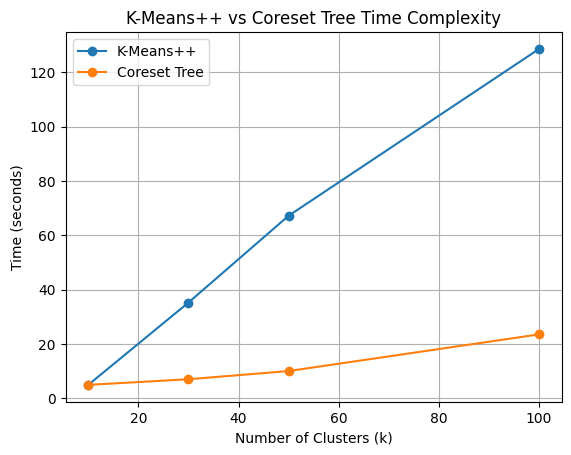

In [22]:
fig, ax = plt.subplots()
ax.plot(ks, kmpp_times, label='K-Means++', marker='o')
ax.plot(ks, coreset_tree_times, label='Coreset Tree', marker='o')
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Time (seconds)')
ax.set_title('K-Means++ vs Coreset Tree Time Complexity')
ax.legend()
plt.grid()
plt.savefig('kmeans_vs_coreset_tree.png')
plt.show()

## Visualizations

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

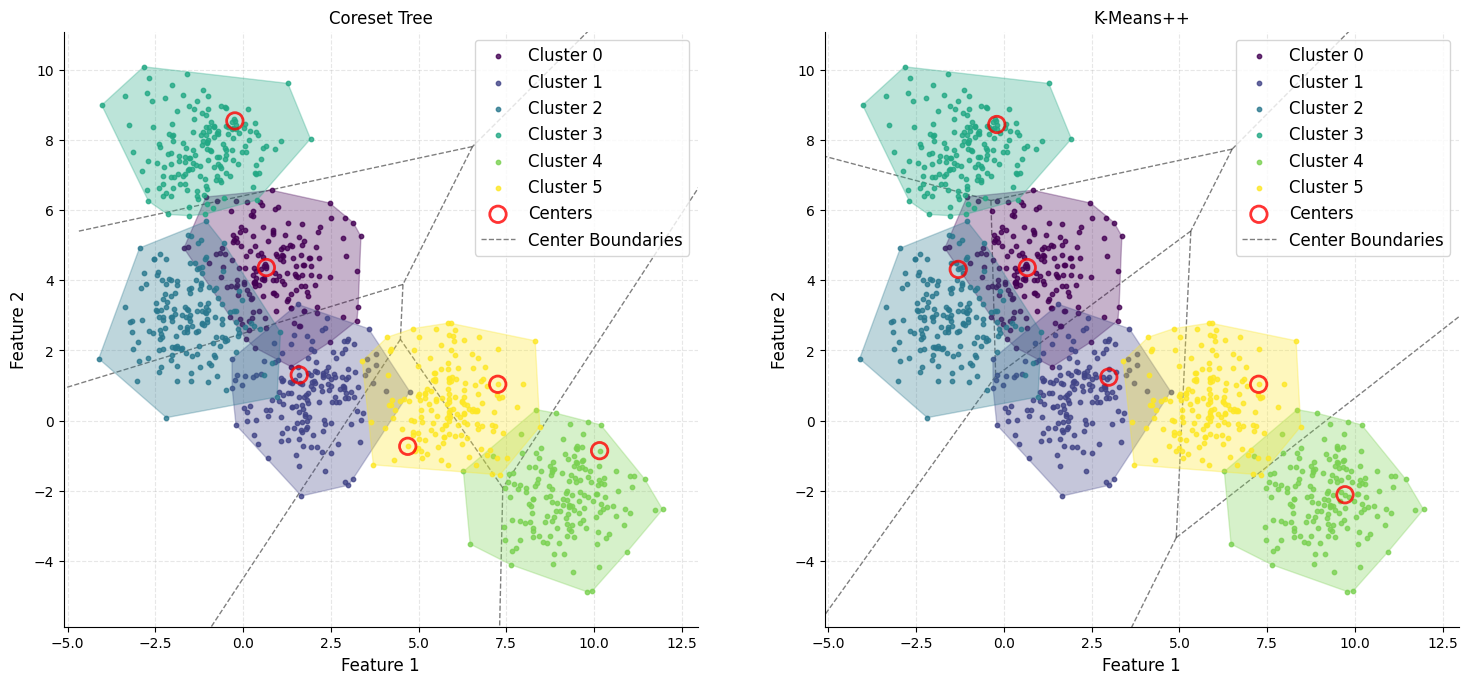

In [ ]:
from sklearn.datasets import make_blobs
from layer_flow.clustering.draw import plot_cluster_hulls
seed = 0
X, y = make_blobs(n_samples=1000, n_features=2, centers=6, random_state=seed)

k = 6
centroids_coreset = coreset_tree(X, k, seed, verbose=True)
centroids_kmpp = kmpp(X, k, seed, verbose=True)

fig, ax = plt.subplots(1, 2, figsize=(18, 10))
ax[0].set_title('Coreset Tree')
ax[1].set_title('K-Means++')
plot_cluster_hulls(X, centroids_coreset, y, ax=ax[0])
plot_cluster_hulls(X, centroids_kmpp, y, ax=ax[1])

plt.show()